In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
X_train = pd.read_csv('train_trans.csv')
y_train = X_train['FLAG']
X_val = pd.read_csv('val_trans.csv')
y_val = X_val['FLAG']
X_test = pd.read_csv('test_trans.csv')
y_test = X_test['FLAG']

In [3]:
X_train.drop(columns=['Unnamed: 0','FLAG'], inplace = True) # drop the first two columns
X_val.drop(columns=['Unnamed: 0','FLAG'], inplace = True)
X_test.drop(columns=['Unnamed: 0','FLAG'], inplace = True)

In [4]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
train_pred = rf.predict(X_train)
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6205
           1       1.00      1.00      1.00      1765

    accuracy                           1.00      7970
   macro avg       1.00      1.00      1.00      7970
weighted avg       1.00      1.00      1.00      7970



In [5]:
val_pred = rf.predict(X_val)
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       690
           1       0.98      0.95      0.96       196

    accuracy                           0.98       886
   macro avg       0.98      0.97      0.98       886
weighted avg       0.98      0.98      0.98       886



model is overfitted as it is performing better on the training data set

### Hyperparameter tuning

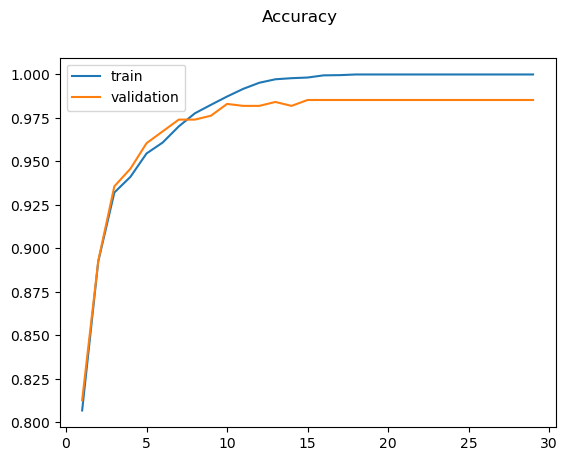

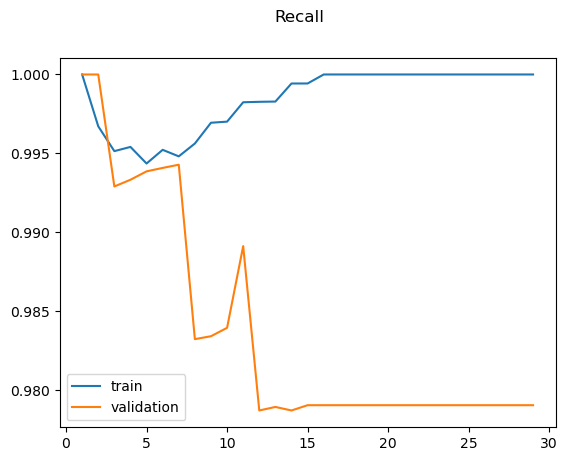

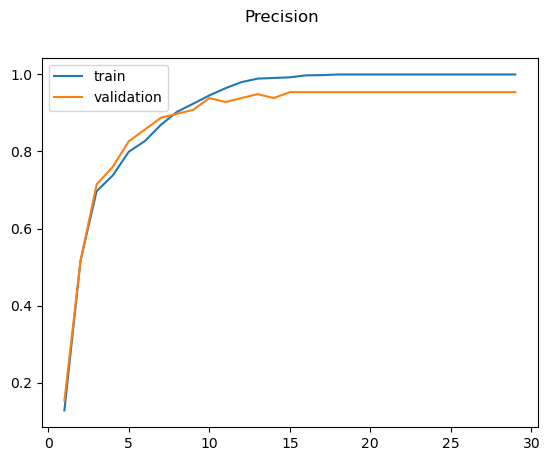

In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
import seaborn as sns

max_depth = list(range(1,30))
train = {
    'accuracy':[],
    'precision':[],
    'recall':[]
}
val = {
    'accuracy':[],
    'precision':[],
    'recall':[]
}

for i in max_depth:
    rf = RandomForestClassifier(random_state=42,max_depth=i)
    rf.fit(X_train,y_train)
    train_pred = rf.predict(X_train)
    val_pred = rf.predict(X_val)

    train['accuracy'].append(accuracy_score(train_pred,y_train))
    val['accuracy'].append(accuracy_score(val_pred,y_val))

    train['precision'].append(precision_score(train_pred,y_train))
    val['precision'].append(precision_score(val_pred,y_val))

    train['recall'].append(recall_score(train_pred,y_train))
    val['recall'].append(recall_score(val_pred,y_val))
#plot results
plt.plot(max_depth,train['accuracy'], label = "train")
plt.plot(max_depth,val['accuracy'], label = "validation")
plt.legend()
plt.suptitle('Accuracy')
plt.show() 

plt.plot(max_depth,train['recall'], label = "train")
plt.plot(max_depth,val['recall'], label = "validation")
plt.legend()
plt.suptitle('Recall')
plt.show() 

plt.plot(max_depth,train['precision'], label = "train")
plt.plot(max_depth,val['precision'], label = "validation")
plt.legend()
plt.suptitle('Precision')
plt.show() 

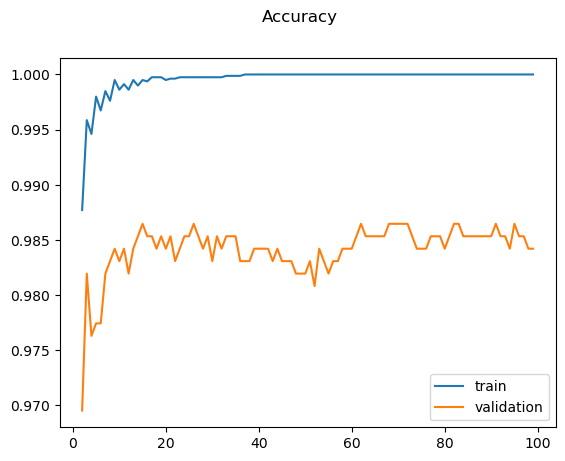

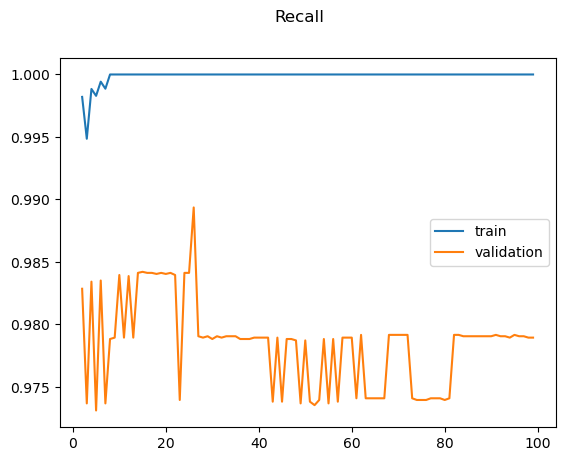

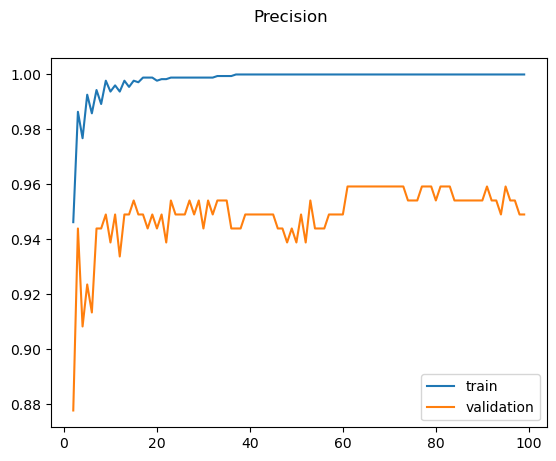

In [7]:
n_estimators = list(range(2,100))
train = {
    'accuracy':[],
    'precision':[],
    'recall':[]
}
val = {
    'accuracy':[],
    'precision':[],
    'recall':[]
}

for i in n_estimators:
    rf = RandomForestClassifier(random_state=42,n_estimators=i)
    rf.fit(X_train,y_train)
    train_pred = rf.predict(X_train)
    val_pred = rf.predict(X_val)

    train['accuracy'].append(accuracy_score(train_pred,y_train))
    val['accuracy'].append(accuracy_score(val_pred,y_val))

    train['precision'].append(precision_score(train_pred,y_train))
    val['precision'].append(precision_score(val_pred,y_val))

    train['recall'].append(recall_score(train_pred,y_train))
    val['recall'].append(recall_score(val_pred,y_val))

plt.plot(n_estimators,train['accuracy'], label = "train")
plt.plot(n_estimators,val['accuracy'], label = "validation")
plt.legend()
plt.suptitle('Accuracy')
plt.show()

plt.plot(n_estimators,train['recall'], label = "train")
plt.plot(n_estimators,val['recall'], label = "validation")
plt.legend()
plt.suptitle('Recall')
plt.show()

plt.plot(n_estimators,train['precision'], label = "train")
plt.plot(n_estimators,val['precision'], label = "validation")
plt.legend()
plt.suptitle('Precision')
plt.show()

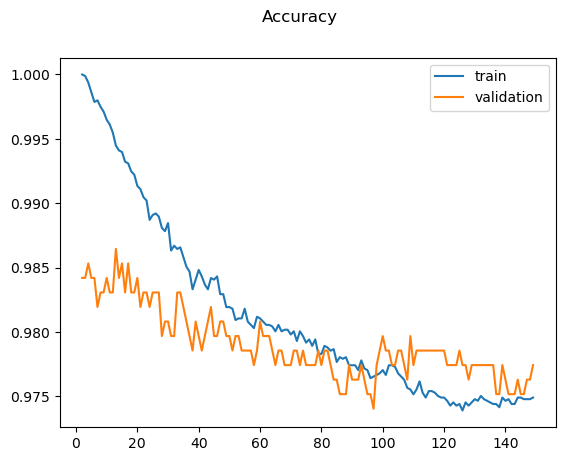

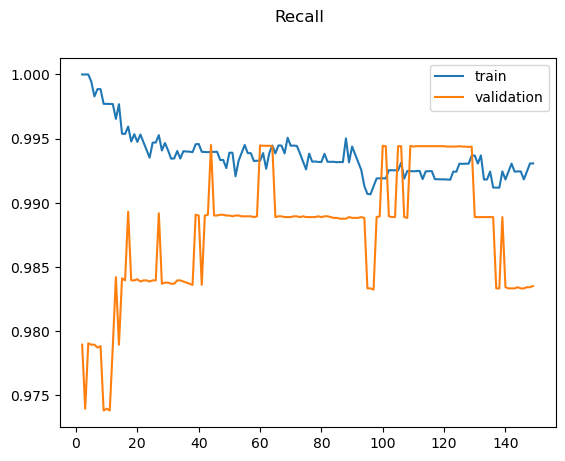

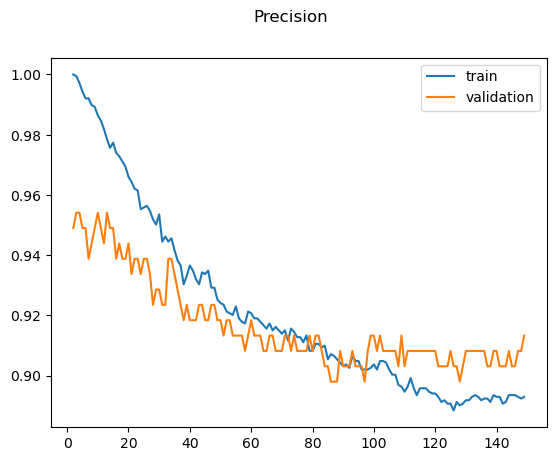

In [8]:
min_samples_split = list(range(2,150))
train = {
    'accuracy':[],
    'precision':[],
    'recall':[]
}
val = {
    'accuracy':[],
    'precision':[],
    'recall':[]
}

for i in min_samples_split:
    rf = RandomForestClassifier(random_state=42,min_samples_split = i)
    rf.fit(X_train,y_train)
    train_pred = rf.predict(X_train)
    val_pred = rf.predict(X_val)

    train['accuracy'].append(accuracy_score(train_pred,y_train))
    val['accuracy'].append(accuracy_score(val_pred,y_val))

    train['precision'].append(precision_score(train_pred,y_train))
    val['precision'].append(precision_score(val_pred,y_val))

    train['recall'].append(recall_score(train_pred,y_train))
    val['recall'].append(recall_score(val_pred,y_val))

plt.plot(min_samples_split,train['accuracy'], label = "train")
plt.plot(min_samples_split,val['accuracy'], label = "validation")
plt.legend()
plt.suptitle('Accuracy')
plt.show()

plt.plot(min_samples_split,train['recall'], label = "train")
plt.plot(min_samples_split,val['recall'], label = "validation")
plt.legend()
plt.suptitle('Recall')
plt.show()

plt.plot(min_samples_split,train['precision'], label = "train")
plt.plot(min_samples_split,val['precision'], label = "validation")
plt.legend()
plt.suptitle('Precision')
plt.show()

In [9]:
rf = RandomForestClassifier(random_state=42,max_depth=20,n_estimators=20,min_samples_split=70)
rf.fit(X_train,y_train)
train_pred = rf.predict(X_train)
print(classification_report(y_train, train_pred))
val_pred = rf.predict(X_val)
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6205
           1       0.99      0.92      0.96      1765

    accuracy                           0.98      7970
   macro avg       0.99      0.96      0.97      7970
weighted avg       0.98      0.98      0.98      7970

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       690
           1       0.99      0.92      0.95       196

    accuracy                           0.98       886
   macro avg       0.99      0.96      0.97       886
weighted avg       0.98      0.98      0.98       886



In [10]:
sorted_idx = rf.feature_importances_.argsort()
feature_names=X_train.columns

In [11]:
feature_names.__len__()

62

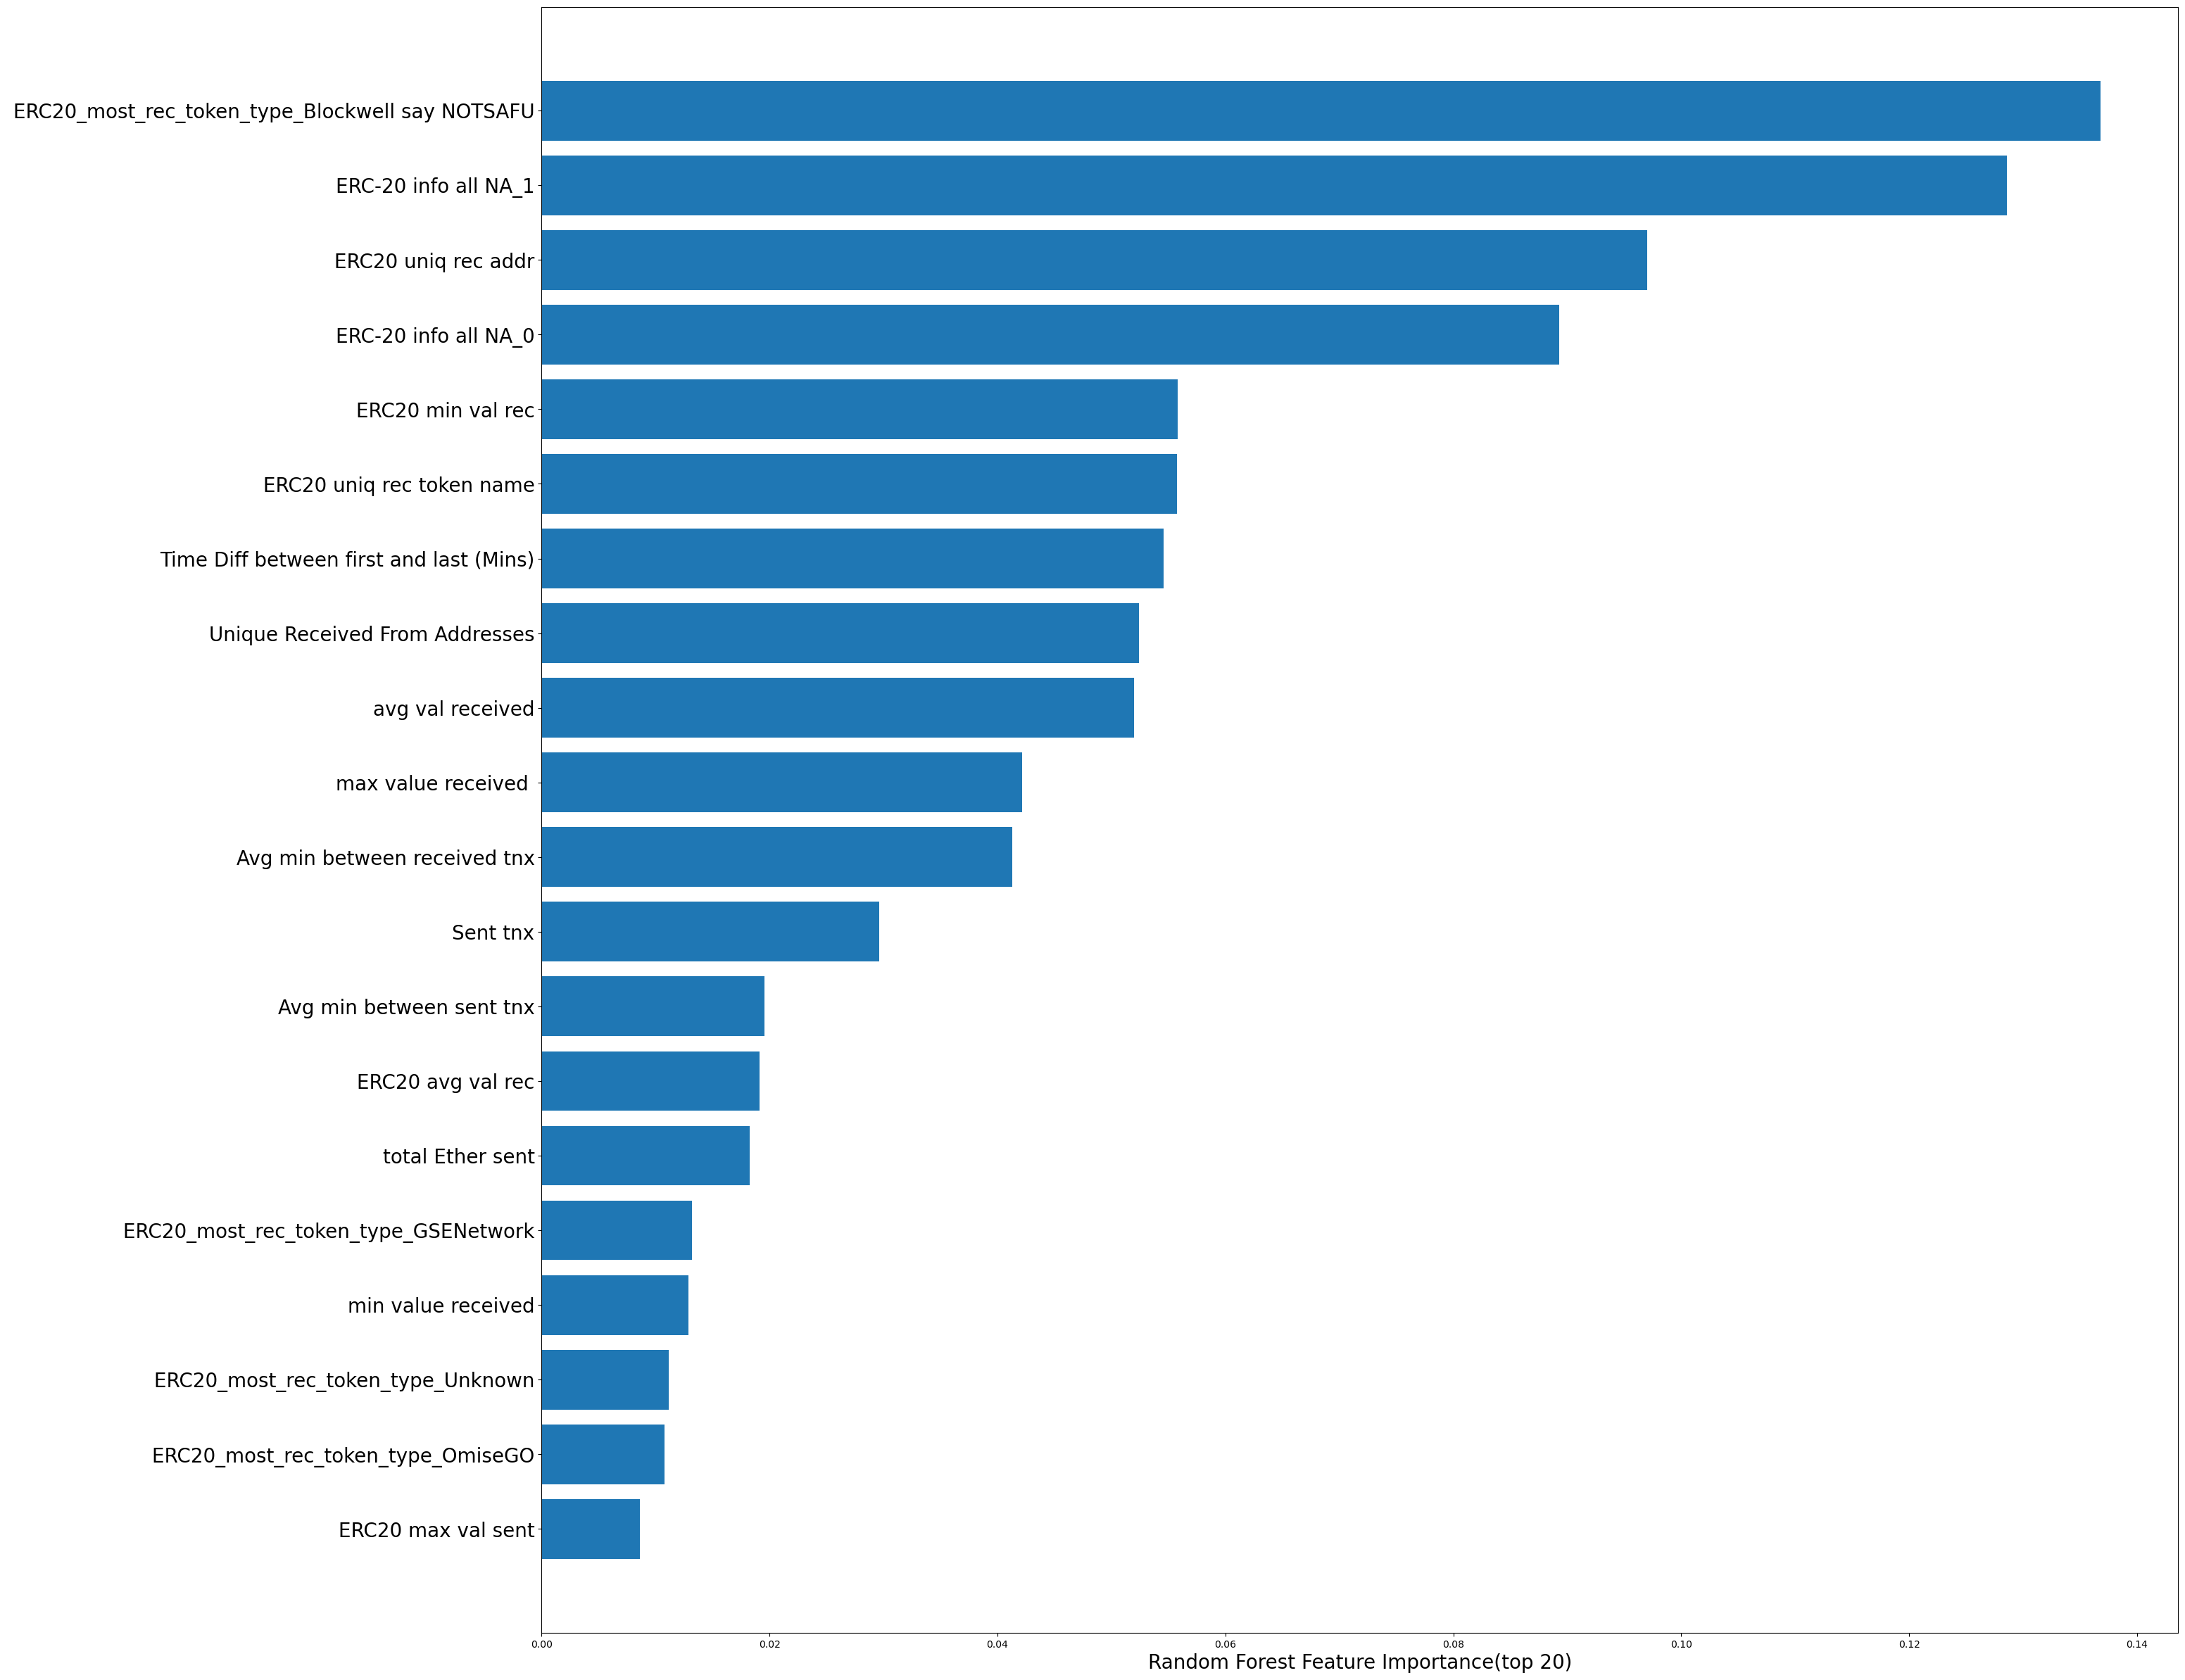

In [12]:
fig, axes = plt.subplots(figsize=(30,30))
plt.barh(feature_names[sorted_idx][42:],rf.feature_importances_[sorted_idx][42:])
plt.xlabel("Random Forest Feature Importance(top 20)", fontdict={'size':20})
plt.yticks(font={'size':20})
plt.show()

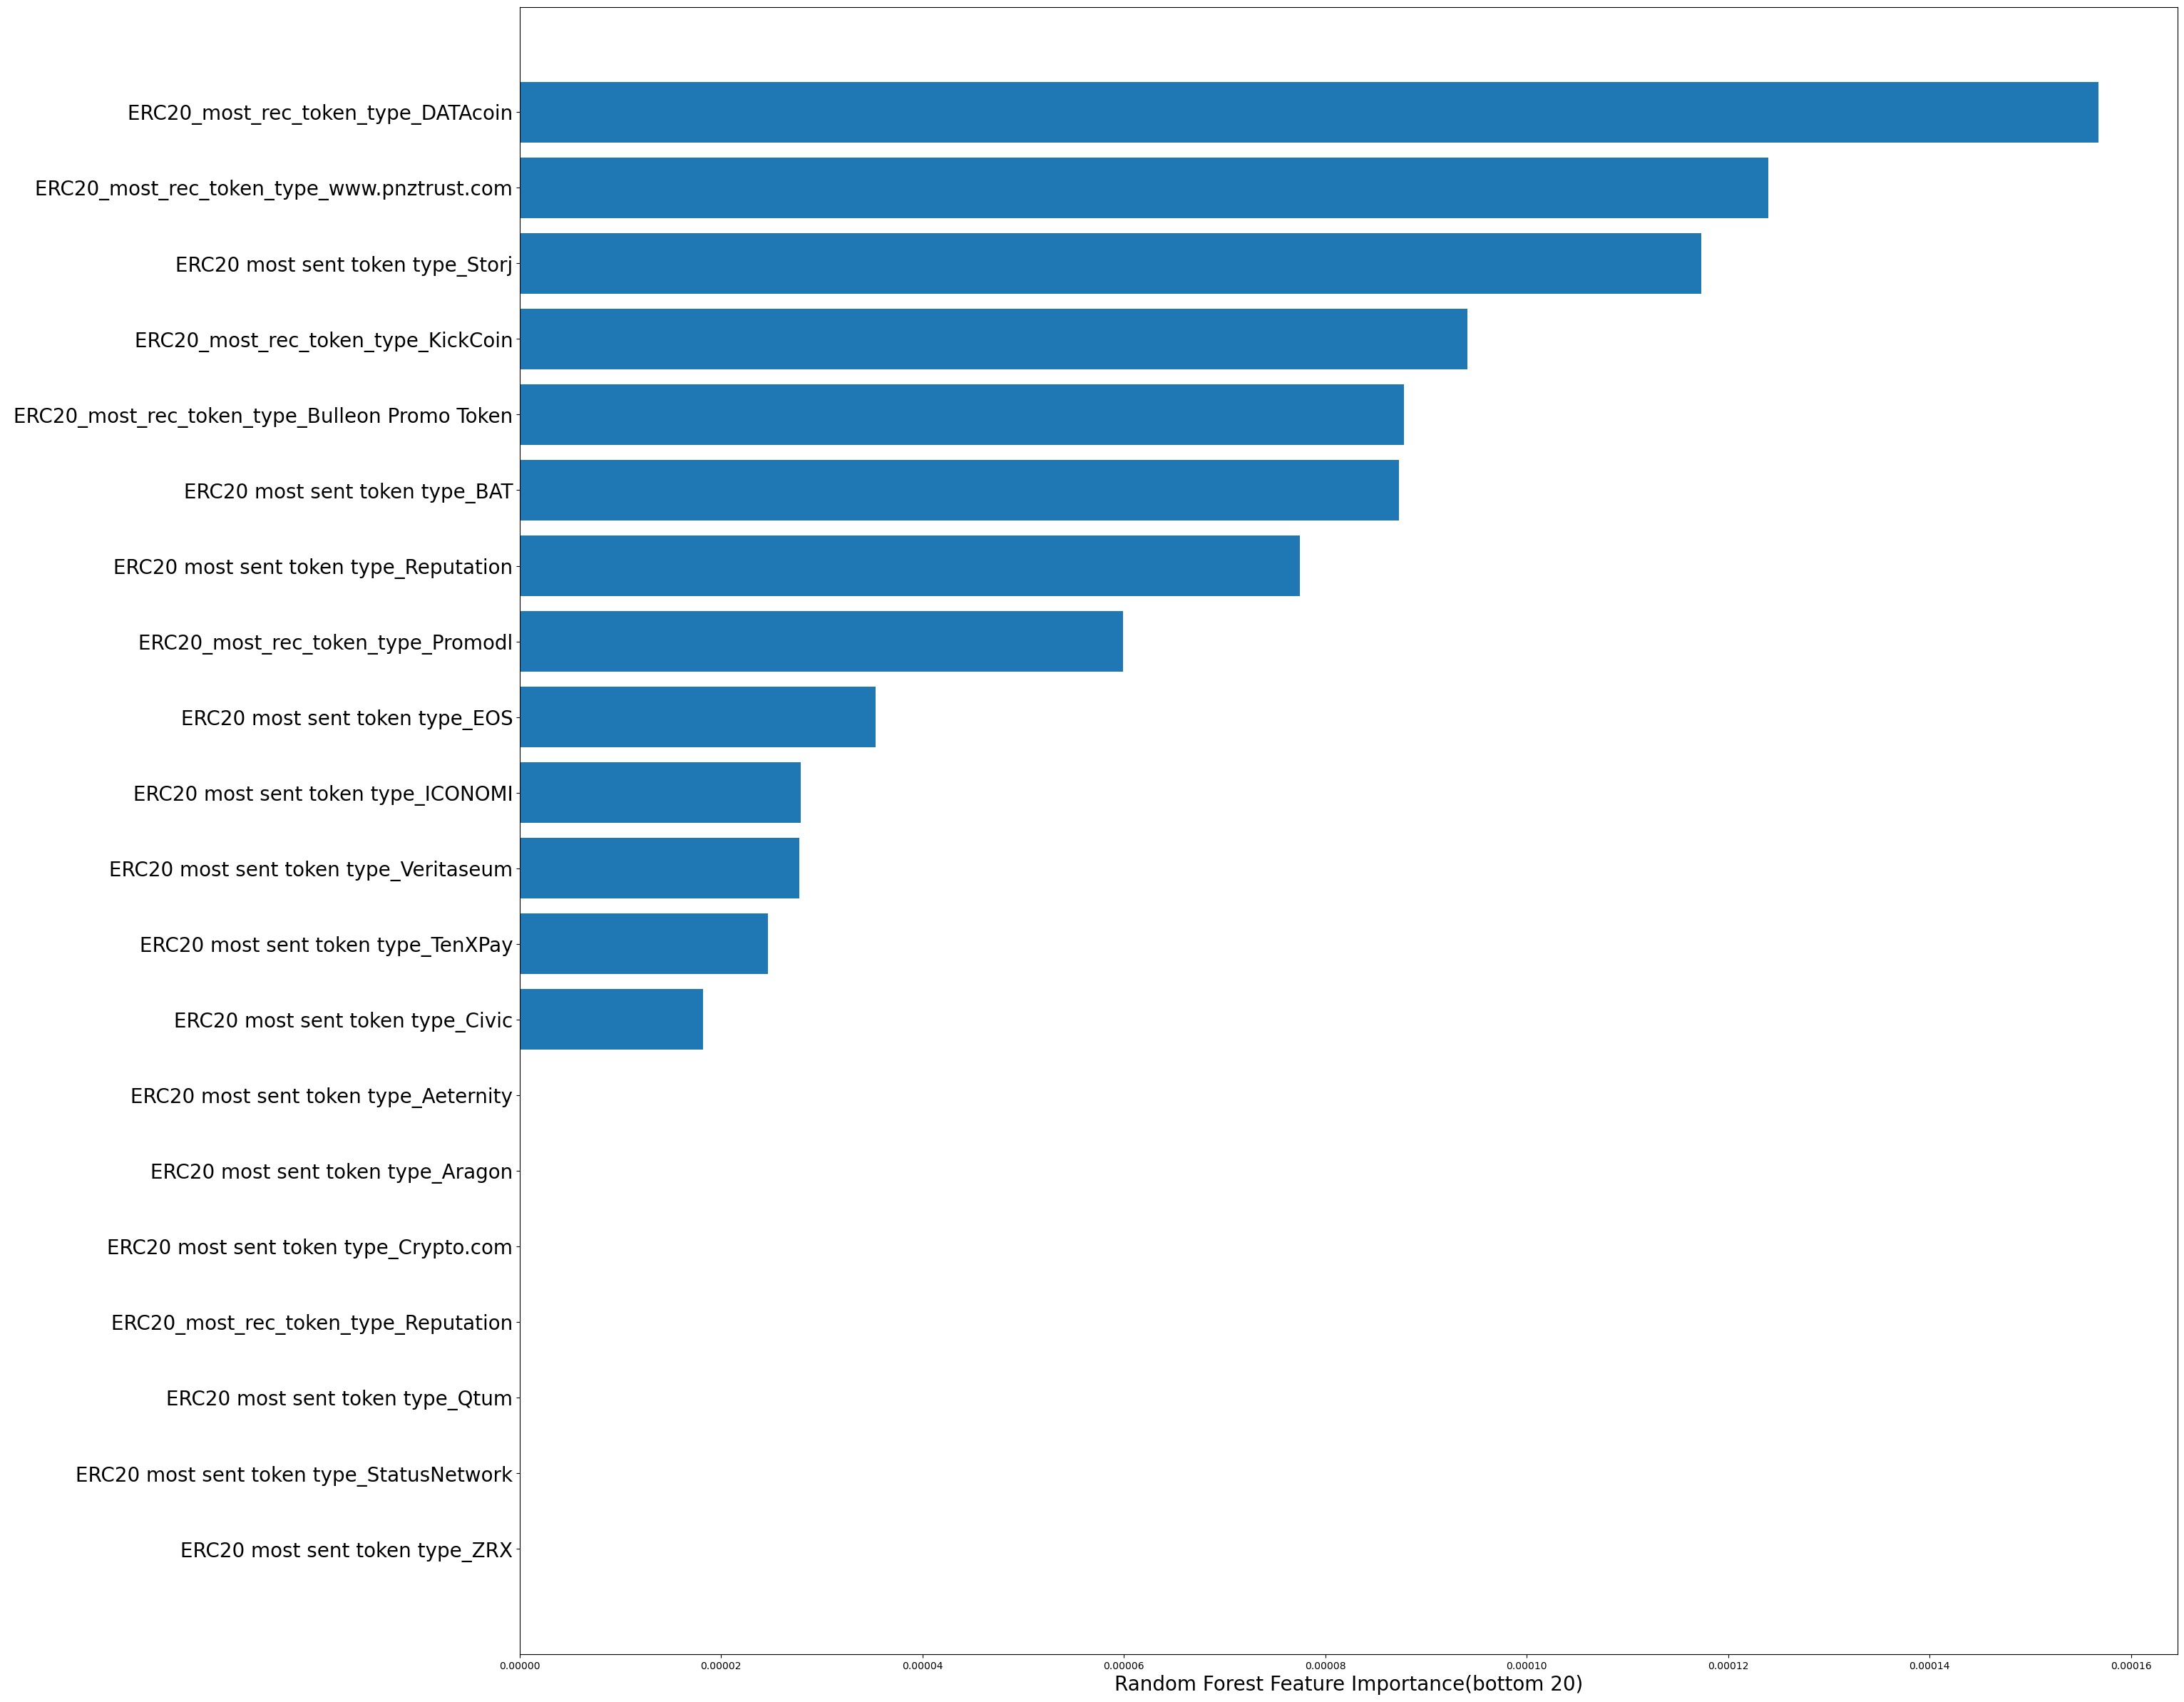

In [13]:
fig, axes = plt.subplots(figsize=(30,30))
plt.barh(feature_names[sorted_idx][:20],rf.feature_importances_[sorted_idx][:20])
plt.xlabel("Random Forest Feature Importance(bottom 20)", fontdict={'size':20})
plt.yticks(font={'size':20})
plt.show()

FINAL MODEL is evaluated on Test Set

In [14]:
test_pred = rf.predict(X_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       767
           1       0.99      0.92      0.95       218

    accuracy                           0.98       985
   macro avg       0.98      0.96      0.97       985
weighted avg       0.98      0.98      0.98       985

